In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import requests
import random
import scipy.stats as st
import os
import gmaps

from config import g_key

# Dallas

In [2]:
# import yelp city csv & read into dataframe
dallas_yelp_path = "../Output/Data/dallas_restaurants.csv"
dallas_yelp = pd.read_csv(dallas_yelp_path)
dallas_yelp

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0
2,Sum Dang Good Chinese,Dallas,32.779323,-96.828615,75212,chinese,NaN,4.0
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5
...,...,...,...,...,...,...,...,...
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0
1137,Amigas Fast Food,Dallas,32.771835,-96.697858,75227,mexican,NaN,3.0
1138,CC Wing 'N' Taquria,Dallas,32.882860,-96.759070,75231,mexican,NaN,2.5
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5


In [3]:
dallas_ethnicity_sums = dallas_yelp["ethnicity"].value_counts()

In [4]:
ethnicity_colors=['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'dodgerblue', 'blue', 'darkviolet', 'purple', 'magenta']

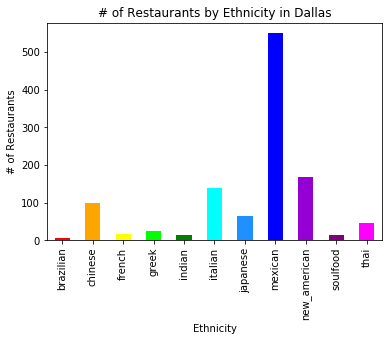

<Figure size 864x432 with 0 Axes>

In [5]:
ethnic_groups = dallas_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()

#my_cmap = cm.get_cmap('plasma')
dallas_ethnic_bar = ethnic_counts.plot(kind='bar', color=ethnicity_colors)
                                       #color=[plt.cm.plasma(np.arange(len(dallas_ethnicity_sums)))])
dallas_ethnic_bar.set_title("# of Restaurants by Ethnicity in Dallas")
dallas_ethnic_bar.set_xlabel("Ethnicity")
dallas_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("../Output/Charts/DallasYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [6]:
price_groups = dallas_yelp["price"].value_counts()
price_groups

$$      441
$       377
$$$      44
$$$$      5
Name: price, dtype: int64

In [7]:
# create new filtered df to drop any restaurants that have no price grade listed
dallas_price_df = pd.DataFrame(dallas_yelp.dropna(subset=['price']))
dallas_price_df['price_int'] = [len(price) for price in dallas_price_df['price']]
dallas_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0,2
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0,1
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5,2
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5,2
6,Royal China,Dallas,32.896104,-96.802183,75230,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
1133,Taco Bell,Dallas,32.909420,-96.767920,75243,mexican,$,2.0,1
1134,La Chiquita Taqueria,Dallas,32.763750,-96.700980,75227,mexican,$,2.0,1
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0,1
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5,1


In [8]:
dallas_ethnic_price = dallas_price_df.groupby("ethnicity")["price"].value_counts()
#dallas_ethnic_price

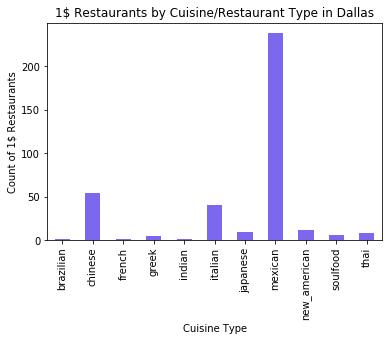

In [9]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("../Output/Charts/Dallas_Ethnic_1$_Bar.png")

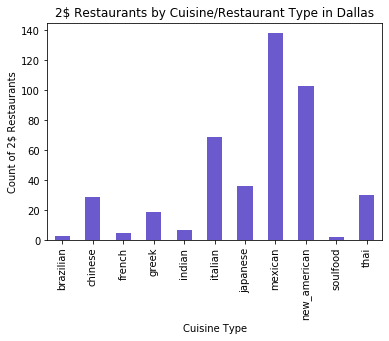

In [10]:
bar_plot2 = dallas_price_df[dallas_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color="slateblue")
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("../Output/Charts/Dallas_Ethnic_2$_Bar.png")

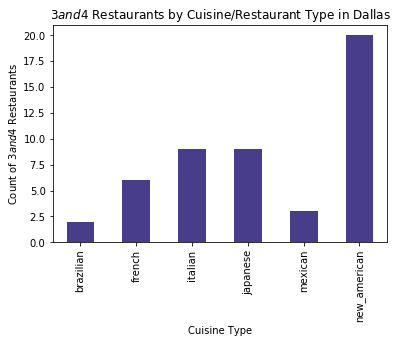

In [11]:
bar_plot3 = dallas_price_df[(dallas_price_df["price_int"]==3)|(dallas_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("../Output/Charts/Dallas_Ethnic_3$4$_Bar.png")

In [12]:
# bar_plot.set_xlabel("Ethnicity & Pricepoint")
# bar_plot.set_ylabel("Count")
# bar_plot.set_title("Breakdown of Restaurant Ethnicity by Pricepoint - Dallas")
# #plt.savefig("./Output/Charts/Dallas_Ethnicity_Price_Bar.png")
# plt.tight_layout()
# plt.show()

In [13]:
dallas_rating_price = dallas_price_df.groupby("rating")["price"].value_counts()
#dallas_rating_price

In [14]:
# bar_plot = dallas_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# bar_plot.set_xlabel("Rating & Pricepoint")
# bar_plot.set_ylabel("Count")
# bar_plot.set_title("Breakdown of Restaurant Rating by Pricepoint - Dallas")
# #plt.savefig("./Output/Charts/Dallas_Rating_Price_Bar.png")
# plt.show()

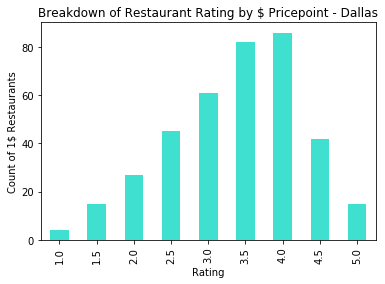

In [15]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Dallas")
plt.savefig("../Output/Charts/Dallas_Rating_1$_Bar.png")

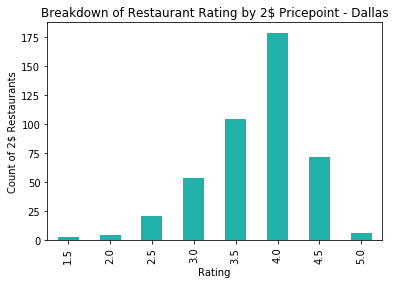

In [16]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot.set_ylabel("Count of 2$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Dallas")
plt.savefig("../Output/Charts/Dallas_Rating_2$_Bar.png")

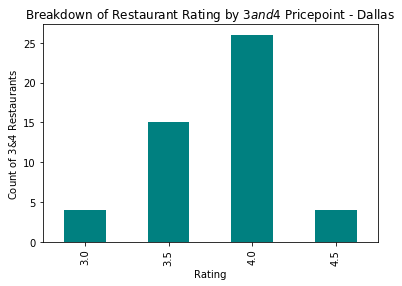

In [17]:
bar_plot3 = dallas_price_df[(dallas_price_df["price_int"]==3)|(dallas_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Dallas")
plt.savefig("../Output/Charts/Dallas_Rating_3$4$_Bar.png")

In [18]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = dallas_price_df[["latitude", "longitude"]]
price = dallas_price_df["price_int"].astype(float)
dallas_center = (32.779167, -96.808891)

fig = gmaps.figure(layout=figure_layout, center=dallas_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=10)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))

# Seattle

In [19]:
# import yelp city csv & read into dataframe
seattle_yelp_path = "../Output/Data/seattle_restaurants.csv"
seattle_yelp = pd.read_csv(seattle_yelp_path)
seattle_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5


In [20]:
seattle_ethnicity_sums = seattle_yelp["ethnicity"].value_counts()
seattle_ethnicity_sums

mexican         261
new_american    243
japanese        222
chinese         180
italian         160
thai            150
indian           57
greek            51
french           37
soulfood         12
brazilian         5
Name: ethnicity, dtype: int64

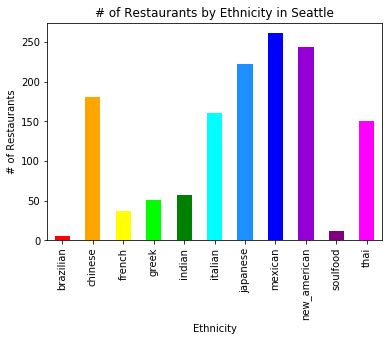

<Figure size 864x432 with 0 Axes>

In [21]:
ethnic_groups = seattle_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()
seattle_ethnic_bar = ethnic_counts.plot(kind='bar', color=ethnicity_colors)
seattle_ethnic_bar.set_title("# of Restaurants by Ethnicity in Seattle")
seattle_ethnic_bar.set_xlabel("Ethnicity")
seattle_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("../Output/Charts/SeattleYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [22]:
seattle_price_df = pd.DataFrame(seattle_yelp.dropna(subset=['price']))
seattle_price_df['price_int'] = [len(price) for price in seattle_price_df['price']]
seattle_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0,1
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0,2
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0,2
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0,2
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5,2
...,...,...,...,...,...,...,...,...,...
1373,Taco Time,Seattle,47.711987,-122.186876,98034,mexican,$,3.5,1
1374,Jack in the Box,Seattle,47.720318,-122.345448,98133,mexican,$,2.0,1
1375,Chipotle Mexican Grill,Seattle,47.560212,-122.386614,98116,mexican,$,2.5,1
1376,Taco Del Mar,Seattle,47.616689,-122.204980,98004,mexican,$,3.0,1


In [23]:
seattle_ethnic_price = seattle_price_df.groupby("ethnicity")["price"].value_counts()
#seattle_ethnic_price

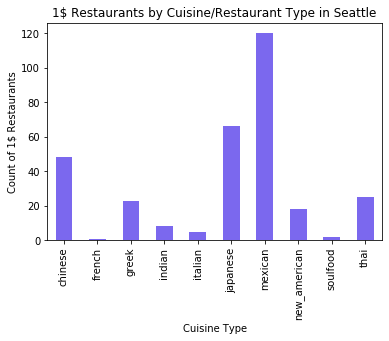

In [24]:
bar_plot = seattle_price_df[seattle_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("../Output/Charts/Seattle_Ethnic_1$_Bar.png")

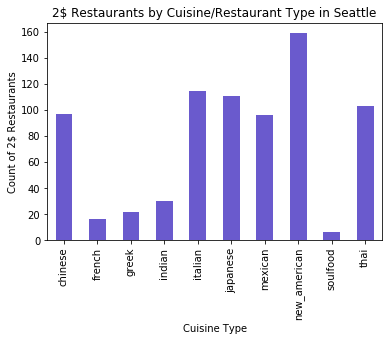

In [25]:
bar_plot2 = seattle_price_df[seattle_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color='slateblue')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("../Output/Charts/Seattle_Ethnic_2$_Bar.png")

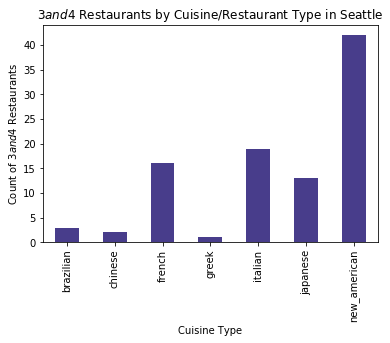

In [26]:
bar_plot3 = seattle_price_df[(seattle_price_df["price_int"]==3)|(seattle_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("../Output/Charts/Seattle_Ethnic_3$4$_Bar.png")

In [27]:
# bar_plot = seattle_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
# bar_plot.set_xlabel = ("Ethnicity & Pricepoint")
# bar_plot.set_ylabel =("Count")
# bar_plot.set_title = ("Breakdown of Restaurant Ethnicity by Pricepoint - Seattle")
# #plt.savefig("./Output/Charts/Seattle_Ethnic_Price_Bar.png")
# plt.show()

In [28]:
seattle_rating_price = seattle_price_df.groupby("rating")["price"].value_counts()
# seattle_rating_price

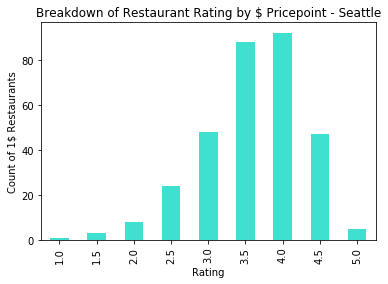

In [29]:
bar_plot = seattle_price_df[seattle_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Seattle")
plt.savefig("../Output/Charts/seattle_Rating_$_Bar.png")

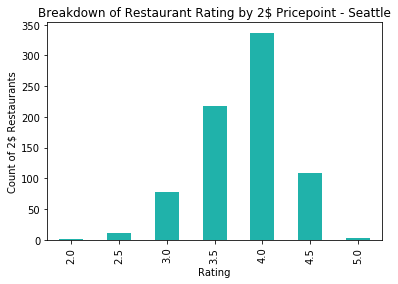

In [30]:
bar_plot2 = seattle_price_df[seattle_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Rating")
bar_plot2.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Seattle")
plt.savefig("../Output/Charts/seattle_Rating_2$_Bar.png")

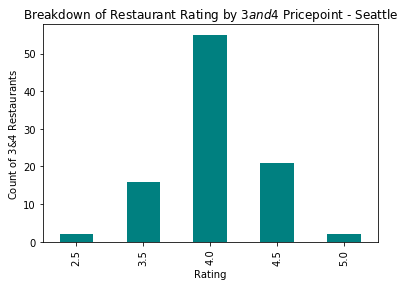

In [31]:
bar_plot3 = seattle_price_df[(seattle_price_df["price_int"]==3)|(seattle_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Seattle")
plt.savefig("../Output/Charts/Seattle_Rating_3$4$_Bar.png")

In [32]:
# seattle_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Rating & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Rating by Pricepoint - Seattle")
# #plt.savefig("./Output/Charts/Seattle_Rating_Price_Bar.png")
# plt.show()

In [33]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = seattle_price_df[["latitude", "longitude"]]
price = seattle_price_df["price_int"].astype(float)
#maxprice = price_int.max()

#dallas_center = (32.779167, -96.808891)
seattle_center = (47.608013, -122.335167)
fig = gmaps.figure(layout=figure_layout, center=seattle_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=5)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))

# Indianapolis

In [34]:
indianapolis_yelp_path = "../Output/Data/indianapolis_restaurants.csv"
indianapolis_yelp = pd.read_csv(indianapolis_yelp_path)
indianapolis_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5


In [35]:
indianapolis_ethnicity_sums = indianapolis_yelp["ethnicity"].value_counts()
# indianapolis_ethnicity_sums

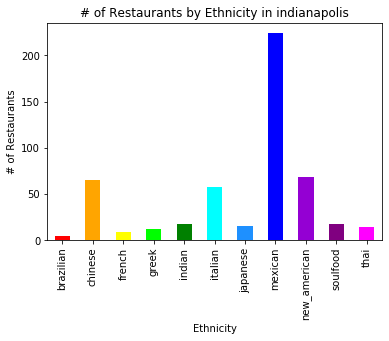

<Figure size 864x432 with 0 Axes>

In [36]:
indy_ethnic_groups = indianapolis_yelp.groupby("ethnicity")
indy_ethnic_counts = indy_ethnic_groups['ethnicity'].count()
indianapolis_ethnic_bar = indy_ethnic_counts.plot(kind='bar', color=ethnicity_colors)
indianapolis_ethnic_bar.set_title("# of Restaurants by Ethnicity in indianapolis")
indianapolis_ethnic_bar.set_xlabel("Ethnicity")
indianapolis_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("../Output/Charts/IndianapolisYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [37]:
indy_price_df = pd.DataFrame(indianapolis_yelp.dropna(subset=['price']))
indy_price_df['price_int'] = [len(price) for price in indy_price_df['price']]
indy_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5,1
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5,1
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0,1
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0,1
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
501,Taco Bell,indianapolis,39.854890,-86.240240,46254,mexican,$,1.5,1
502,Taco Bell,indianapolis,39.905167,-86.059453,46250,mexican,$,2.0,1
503,Chipotle Mexican Grill,indianapolis,39.905766,-86.077454,46250,mexican,$,2.5,1
504,Taco Bell,indianapolis,39.709099,-86.082211,46203,mexican,$,2.0,1


In [38]:
indy_ethnic_price = indy_price_df.groupby("ethnicity")["price"].value_counts()
#indy_ethnic_price

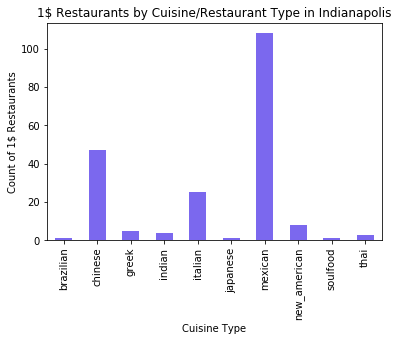

In [39]:
bar_plot = indy_price_df[indy_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("../Output/Charts/indy_Ethnic_1$_Bar.png")

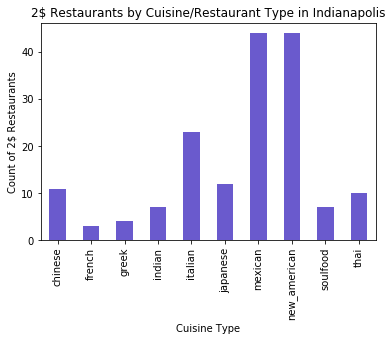

In [40]:
bar_plot2 = indy_price_df[indy_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color='slateblue')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("../Output/Charts/Indy_Ethnic_2$_Bar.png")

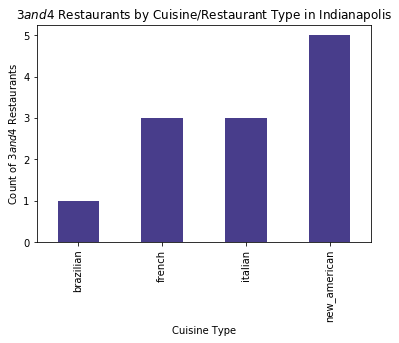

In [41]:
bar_plot3 = indy_price_df[(indy_price_df["price_int"]==3)|(indy_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("../Output/Charts/Indy_Ethnic_3$4$_Bar.png")

In [42]:
# indy_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Ethnicity & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
# #plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
# plt.show()

In [43]:
indy_rating_price = indy_price_df.groupby("rating")["price"].value_counts()
#indy_rating_price

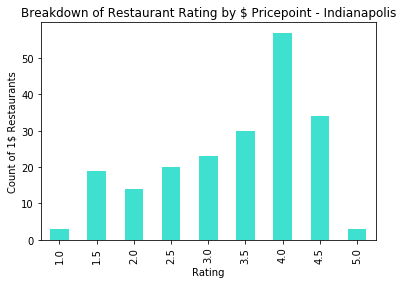

In [44]:
bar_plot = indy_price_df[indy_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Indianapolis")
plt.savefig("../Output/Charts/Indy_Rating_1$_Bar.png")

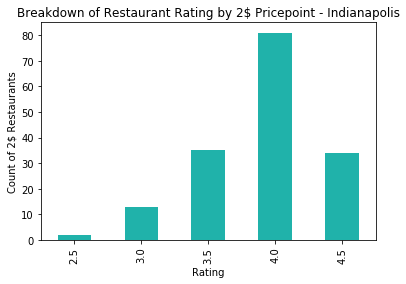

In [45]:
bar_plot2 = indy_price_df[indy_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Rating")
bar_plot2.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Indianapolis")
plt.savefig("../Output/Charts/Indy_Rating_2$_Bar.png")

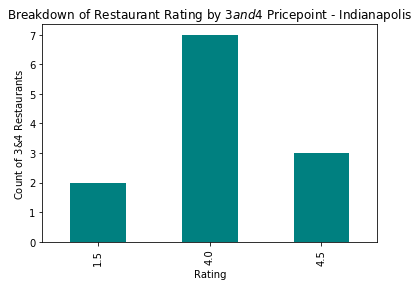

In [46]:
bar_plot3 = indy_price_df[(indy_price_df["price_int"]==3)|(indy_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Indianapolis")
plt.savefig("../Output/Charts/Indy_Rating_3$4$_Bar.png")

In [47]:
# indy_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Rating & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
# #plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
# plt.show()

In [48]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = indy_price_df[["latitude", "longitude"]]
price = indy_price_df["price_int"].astype(float)
indy_center = (39.791000, -86.148003)

fig = gmaps.figure(layout=figure_layout, center=indy_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=10)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))

# Atlanta

In [49]:
# read in atlanta csv

atlanta_restaurant_totals = pd.read_csv("../Output/Data/atlanta_restaurants.csv")

In [50]:
atlanta_restaurant_totals

,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
...,...,...,...,...,...,...,...,...,...
1078,1078,Saigon Cafe - Cumberland,Atlanta,33.887040,-84.475595,30080,thai,$$,3.5
1079,1079,Thai Cafe,Atlanta,33.879660,-84.467664,30339,thai,NaN,2.5
1080,1080,T1 Bento,Atlanta,33.907766,-84.289732,30341,thai,$,4.0
1081,1081,Tin Drum Asian Kitchen - Akers Mill Square,Atlanta,33.882804,-84.462033,30339,thai,$,2.5


In [51]:
atlanta_summary_df = atlanta_restaurant_totals.groupby('ethnicity')

atlanta_summary_df.head()

,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
149,149,Le Colonial - Atlanta,Atlanta,33.837408,-84.380267,30305,french,NaN,4.5
150,150,Nikolai's Roof,Atlanta,33.761570,-84.383360,30303,french,$$$,4.0
151,151,Tiny Lou's,Atlanta,33.773360,-84.361350,30306,french,$$,4.0
152,152,Bistro Niko,Atlanta,33.846614,-84.368617,30326,french,$$,4.0
153,153,Cooks & Soldiers,Atlanta,33.786004,-84.411355,30318,french,$$,4.5


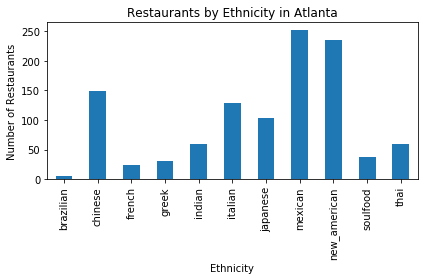

In [52]:
#create a bar chart for all ethnicities total restaurants


atl_ethnic_total= atlanta_summary_df['ethnicity'].count()

atl_ethnic_bar = atl_ethnic_total.plot(kind='bar')
atl_ethnic_bar.set_title("Restaurants by Ethnicity in Atlanta")
atl_ethnic_bar.set_xlabel("Ethnicity")
atl_ethnic_bar.set_ylabel("Number of Restaurants")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_atlanta.png")

plt.tight_layout()
plt.show()


In [53]:
price_df = atlanta_restaurant_totals.dropna()
price_df['price_int'] = [ len(price) for price in price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
# value counts for ethnicities

ethnic_counts = price_df['ethnicity'].value_counts()

ethnic_counts

new_american    200
mexican         186
chinese         125
italian         112
japanese         85
thai             50
indian           47
greek            29
soulfood         24
french           18
brazilian         4
Name: ethnicity, dtype: int64

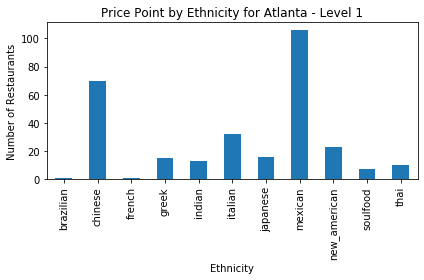

In [55]:
# Plot a bar chart for price level by ethnicity - price level 1

atl_ethnic_price1 = price_df[price_df['price_int']==1].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
atl_ethnic_price1.set_xlabel("Ethnicity")
atl_ethnic_price1.set_ylabel("Number of Restaurants")
atl_ethnic_price1.set_title("Price Point by Ethnicity for Atlanta - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price1_ethnicity_atlanta.png")
plt.show()

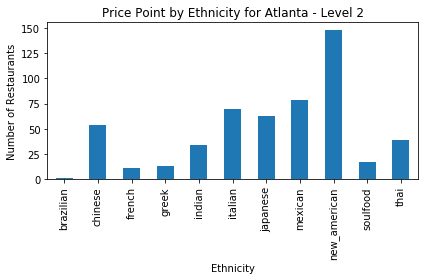

In [56]:
# Plot a bar chart for price level by ethnicity - price level 2

atl_ethnic_price2 = price_df[price_df['price_int']==2].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
atl_ethnic_price2.set_xlabel("Ethnicity")
atl_ethnic_price2.set_ylabel("Number of Restaurants")
atl_ethnic_price2.set_title("Price Point by Ethnicity for Atlanta - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price2_ethnicity_atlanta.png")
plt.show()

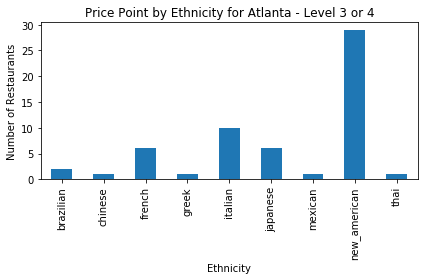

In [57]:
# Plot a bar chart for price level by ethnicity - price level 3 or 4

atl_ethnic_price34 = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)].groupby('ethnicity').count()['name'].plot(kind='bar')

#Set labels 
atl_ethnic_price34.set_xlabel("Ethnicity")
atl_ethnic_price34.set_ylabel("Number of Restaurants")
atl_ethnic_price34.set_title("Price Point by Ethnicity for Atlanta - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price34_ethnicity_atlanta.png")
plt.show()

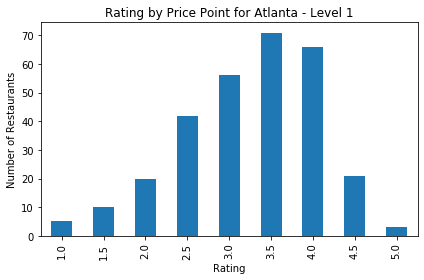

In [58]:
# Plot a bar chart price vs rating - 1 $

atl_rating_price1 = price_df[price_df['price_int']==1].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price1.set_xlabel("Rating")
atl_rating_price1.set_ylabel("Number of Restaurants")
atl_rating_price1.set_title("Rating by Price Point for Atlanta - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating1_atlanta.png")
plt.show()

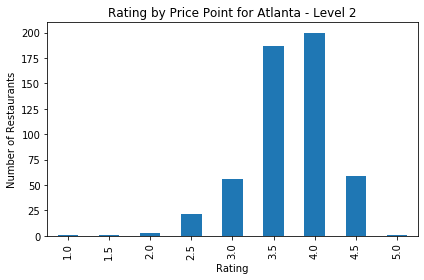

In [59]:
# Plot a bar chart price vs rating - 2 $

atl_rating_price2 = price_df[price_df['price_int']==2].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price2.set_xlabel("Rating")
atl_rating_price2.set_ylabel("Number of Restaurants")
atl_rating_price2.set_title("Rating by Price Point for Atlanta - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating2_atlanta.png")
plt.show()

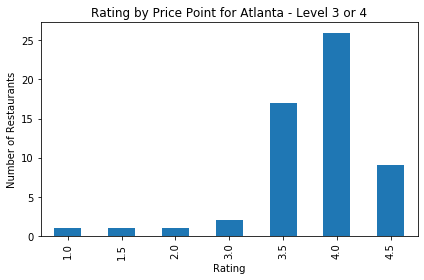

In [60]:
# Plot a bar chart price vs rating - 3 or 4 $

atl_rating_price34 = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price34.set_xlabel("Rating")
atl_rating_price34.set_ylabel("Number of Restaurants")
atl_rating_price34.set_title("Rating by Price Point for Atlanta - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating34_atlanta.png")
plt.show()

In [61]:
#heat map

#configure gmaps
gmaps.configure(api_key=g_key)

#Use the Lat and Lng as locations 
atl_locations = price_df[["latitude", "longitude"]]
atl_prices = price_df["price_int"]

In [62]:
#Add Heatmap layer to map

atlanta_heatfig = gmaps.figure(center=(33.0, -83.0), zoom_level=5)
atlanta_max_intensity = np.max(atl_prices)

atlanta_heat_layer = gmaps.heatmap_layer(atl_locations, weights = atl_prices, dissipating=True, max_intensity=4, point_radius=5)

atlanta_heatfig.add_layer(atlanta_heat_layer)

atlanta_heatfig

Figure(layout=FigureLayout(height='420px'))

# Philadelphia

In [63]:
# read in philly csv

philly_restaurant_totals = pd.read_csv("../Output/Data/philadelphia_restaurants.csv")

In [64]:
philly_restaurant_totals

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
...,...,...,...,...,...,...,...,...
714,A Taste of Thai,Philadelphia,39.953852,-75.157628,19107,thai,$$,3.0
715,Aya Asian Fusion,Philadelphia,40.036950,-75.039910,19136,thai,$$,3.5
716,Mikado Thai Pepper Restaurant,Philadelphia,40.006550,-75.288880,19003,thai,$$,3.5
717,Dream House Asian Bistro,Philadelphia,40.034385,-75.216117,19128,thai,$$,3.0


In [65]:
philly_summary_df = philly_restaurant_totals.groupby('ethnicity')

philly_summary_df.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
173,Parc,Philadelphia,39.949172,-75.170727,19103,french,$$$,4.0
174,The Wayward,Philadelphia,39.950915,-75.159596,19107,french,NaN,4.5
175,Gabi,Philadelphia,39.959250,-75.161510,19102,french,$$,4.5
176,Townsend,Philadelphia,39.951097,-75.176542,19103,french,$$$,4.5
177,Forsythia,Philadelphia,39.948707,-75.145394,19106,french,NaN,4.5


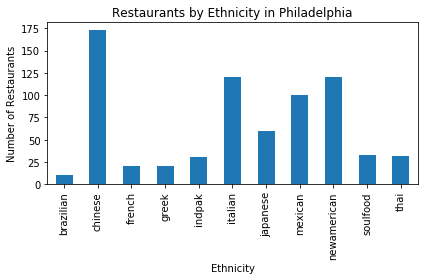

In [66]:
#create a bar chart for all ethnicities total restaurants


phl_ethnic_total= philly_summary_df['ethnicity'].count()

phl_ethnic_bar = phl_ethnic_total.plot(kind='bar')
phl_ethnic_bar.set_title("Restaurants by Ethnicity in Philadelphia")
phl_ethnic_bar.set_xlabel("Ethnicity")
phl_ethnic_bar.set_ylabel("Number of Restaurants")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_philadelphia.png")

plt.tight_layout()
plt.show()

In [67]:
philly_price_df = philly_restaurant_totals.dropna()

philly_price_df['price_int'] = [ len(price) for price in philly_price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
# value counts for ethnicities

ethnic_counts = philly_price_df['ethnicity'].value_counts()

ethnic_counts

chinese        113
newamerican    107
italian         93
mexican         68
japanese        48
thai            29
soulfood        20
indpak          19
greek           18
french          15
brazilian        5
Name: ethnicity, dtype: int64

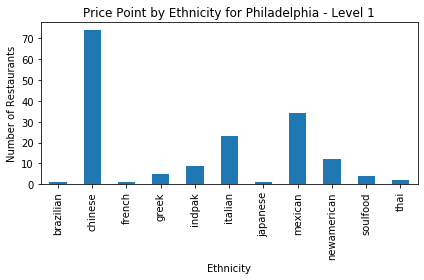

In [69]:
# Plot a bar chart for price level by ethnicity - price level 1

phl_ethnic_price1 = philly_price_df[philly_price_df['price_int']==1].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
phl_ethnic_price1.set_xlabel("Ethnicity")
phl_ethnic_price1.set_ylabel("Number of Restaurants")
phl_ethnic_price1.set_title("Price Point by Ethnicity for Philadelphia - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price1_ethnicity_philadelphia.png")
plt.show()

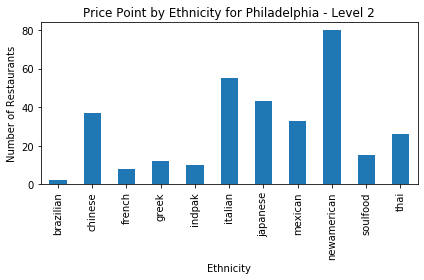

In [70]:
# Plot a bar chart for price level by ethnicity - price level 2

phl_ethnic_price2 = philly_price_df[philly_price_df['price_int']==2].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
phl_ethnic_price2.set_xlabel("Ethnicity")
phl_ethnic_price2.set_ylabel("Number of Restaurants")
phl_ethnic_price2.set_title("Price Point by Ethnicity for Philadelphia - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price2_ethnicity_philadelphia.png")
plt.show()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


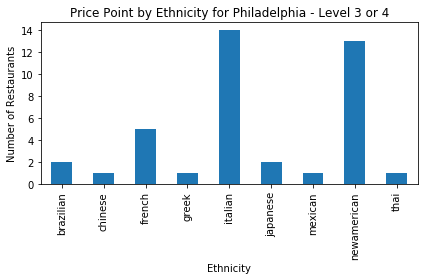

In [71]:
# Plot a bar chart for price level by ethnicity - price level 3 or 4

phl_ethnic_price34 = philly_price_df[(philly_price_df['price_int']==3)|(price_df['price_int']==4)].groupby('ethnicity').count()['name'].plot(kind='bar')

#Set labels 
phl_ethnic_price34.set_xlabel("Ethnicity")
phl_ethnic_price34.set_ylabel("Number of Restaurants")
phl_ethnic_price34.set_title("Price Point by Ethnicity for Philadelphia - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price34_ethnicity_philadelphia.png")
plt.show()

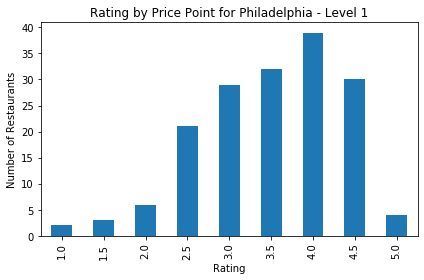

In [72]:
# Plot a bar chart price vs rating - 1 $

phl_rating_price1 = philly_price_df[philly_price_df['price_int']==1].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
phl_rating_price1.set_xlabel("Rating")
phl_rating_price1.set_ylabel("Number of Restaurants")
phl_rating_price1.set_title("Rating by Price Point for Philadelphia - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating1_philadelphia.png")
plt.show()

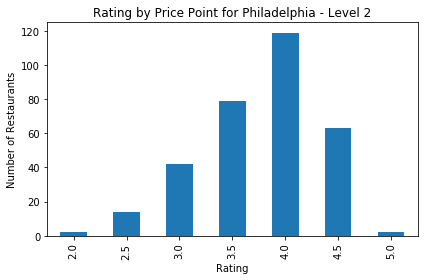

In [73]:
# Plot a bar chart price vs rating - 2 $

phl_rating_price2 = philly_price_df[philly_price_df['price_int']==2].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
phl_rating_price2.set_xlabel("Rating")
phl_rating_price2.set_ylabel("Number of Restaurants")
phl_rating_price2.set_title("Rating by Price Point for Philadelphia - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating2_philadelphia.png")
plt.show()

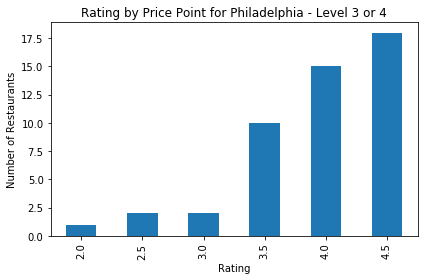

In [74]:
# Plot a bar chart price vs rating - 3 or 4 $

phl_rating_price34 = philly_price_df[(philly_price_df['price_int']==3)|(philly_price_df['price_int']==4)].groupby('rating').count()['name'].plot(kind='bar')


#Set labels 
phl_rating_price34.set_xlabel("Rating")
phl_rating_price34.set_ylabel("Number of Restaurants")
phl_rating_price34.set_title("Rating by Price Point for Philadelphia - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating34_philadelphia.png")
plt.show()

In [75]:
#heat map

#configure gmaps
gmaps.configure(api_key=g_key)

#Use the Lat and Lng as locations 
phl_locations = philly_price_df[["latitude", "longitude"]]
phl_prices = philly_price_df["price_int"]

In [76]:
#Add Heatmap layer to map

philly_heatfig = gmaps.figure(center=(39.0, -75.0), zoom_level=5)
philly_max_intensity = np.max(atl_prices)

philly_heat_layer = gmaps.heatmap_layer(phl_locations, weights = phl_prices, dissipating=True, max_intensity=4, point_radius=5)

philly_heatfig.add_layer(philly_heat_layer)

philly_heatfig

Figure(layout=FigureLayout(height='420px'))